# Support Vector Regression

In [1]:
""" Importing libraries """
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
""" Importing Dataset """
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [6]:
""" Feature Scaling """
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [7]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [8]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [9]:
""" Traning the SVR model on whole dataset """
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [10]:
""" Predicting a new result """
scaled_output = regressor.predict(sc_X.transform([[6.5]]))  # the output will be scaled
scaled_output = scaled_output.reshape(len(scaled_output),1)
sc_y.inverse_transform(scaled_output)

array([[170370.0204065]])

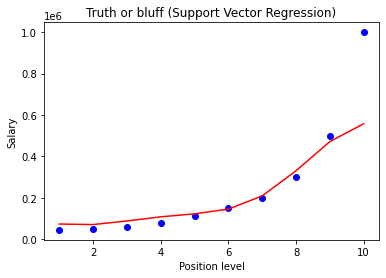

In [11]:
""" Visualising the SVR resuls """
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="blue")
y_pred = regressor.predict(X)
y_pred = y_pred.reshape(len(y_pred),1)
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(y_pred), color="red")
plt.title("Truth or bluff (Support Vector Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

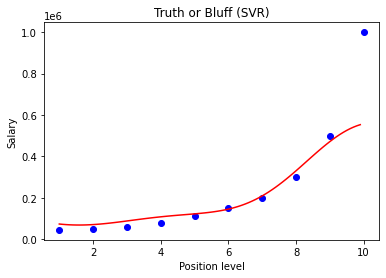

In [12]:
""" Visualising the SVR results (for higher resolution and smoother curve) """
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'blue')
y_pred = regressor.predict(sc_X.transform(X_grid))
y_pred = y_pred.reshape(len(y_pred),1)
plt.plot(X_grid, sc_y.inverse_transform(y_pred), color = 'red')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()